# Анализ рекламных вложений для приложения Procrastinate Pro+

### Описание проекта

*Цели и задачи проекта*

Разобраться в причинах роста убытков компании в последние несколько месяцев и помочь компании выйти в плюс.

*Данные*

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Нам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

*Описание данных*

В нашем распоряжении три датасета. 

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

*План*

- обзор данных, предобработка
- исследовательский анализ данных
- анализ маркетинговых показателей
- оценка окупаемости рекламы
- общий вывод

### Общая информация

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
import numpy as np

In [2]:
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv'))
except:
    visits, orders, costs = (
    pd.read_csv('/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/visits_info_short.csv'),
    pd.read_csv('/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/orders_info_short.csv'),
    pd.read_csv('/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/costs_info_short.csv'))

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [7]:
visits.duplicated().sum()

0

In [8]:
visits['session_start'].min(), visits['session_start'].max()

(Timestamp('2019-05-01 00:00:41'), Timestamp('2019-10-31 23:59:23'))

In [9]:
visits['session_end'].min(), visits['session_end'].max()

(Timestamp('2019-05-01 00:07:06'), Timestamp('2019-11-01 01:38:46'))

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
orders.duplicated().sum()

0

In [14]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [15]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
costs.columns=costs.columns.str.lower()

In [18]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [19]:
costs.duplicated().sum()

0

In [20]:
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [21]:
costs.describe()

costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

***Наблюдение.*** Пропусков и дубликатов в данных не обнаружено. Даты приведены к соответствующему формату. Аномалии в численных данных не найдены.

###  Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

In [30]:
#пользовательские профили
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [31]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
min_date, max_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

***Наблюдение:*** профили пользователей составлены. Данные собраны за 6 месяцев.

Минимальная дата привлечения - 1 мая 2019 г.
Максимальная дата привлечения - 27 октября 2019 г.

In [32]:
region_user = profiles.pivot_table(index='region', values='user_id', aggfunc='count')
region_payer = profiles.query('payer == True').pivot_table(index='region', values='payer', aggfunc='count')
region_sales = region_user.merge(region_payer, on='region', how='left').rename(columns={'user_id':'users'})
region_sales['payer_part,%'] = region_sales['payer'] / region_sales['users'] * 100
region_sales = region_sales.drop(columns=['payer']).sort_values(by='payer_part,%', ascending=False)
region_sales

users  payer_part,%
region                             
United States  100002      6.901862
Germany         14981      4.111875
UK              17575      3.982930
France          17450      3.799427

***Наблюдение:*** в данных содержится информация о пользователях из четырех регионов - США, Великобритания, Франция и Германия.

Доля платящих пользователей выше всего в США - около 7%. 

In [33]:
device_user = profiles.pivot_table(index='device', values='user_id', aggfunc='count')
device_payer = profiles.query('payer == True').pivot_table(index='device', values='payer', aggfunc='count')
device_sales = device_user.merge(device_payer, on='device', how='left').rename(columns={'user_id':'users'})
device_sales['payer_part,%'] = device_sales['payer'] / device_sales['users']*100
device_sales = device_sales.drop(columns=['payer']).sort_values(by='payer_part,%', ascending=False)
device_sales

users  payer_part,%
device                      
Mac      30042      6.364423
iPhone   54479      6.207897
Android  35032      5.851793
PC       30455      5.046790

***Наблюдение:*** платящие пользователи предпочитают Mac(6.4%) и iPhone(6.2%) немногим больше, чем Android(5.9%) и PC(5%). 

In [34]:
channel_user = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channel_payer = profiles.query('payer == True').pivot_table(index='channel', values='payer', aggfunc='count')
channel_sales = channel_user.merge(channel_payer, on='channel', how='left').rename(columns={'user_id':'users'})
channel_sales['payer_part,%'] = channel_sales['payer'] / channel_sales['users']*100
channel_sales = channel_sales.sort_values(by='payer_part,%', ascending=False)
channel_sales

users  payer  payer_part,%
channel                                       
FaceBoom            29144   3557     12.204914
AdNonSense           3880    440     11.340206
lambdaMediaAds       2149    225     10.469986
TipTop              19561   1878      9.600736
RocketSuperAds       4448    352      7.913669
WahooNetBanner       8553    453      5.296387
YRabbit              4312    165      3.826531
MediaTornado         4364    156      3.574702
LeapBob              8553    262      3.063253
OppleCreativeMedia   8605    233      2.707728
organic             56439   1160      2.055316

***Наблюдение:*** больше всего платящих пользователей в численном и процентном выражении привлек канал FaceBoom(12.2% и 3557 клиентов).

Так же в пятерке лидеров AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds.

***Вывод.*** Минимальная и максимальная даты привлечения соответствуют ТЗ - 1 мая 2019 г. и 27 октября 2019 г.

В данных содержится информация о пользователях из четырех регионов - США, Великобритания, Франция и Германия. Доля платящих пользователей выше всего в США - около 7%.

Платящие пользователи предпочитают Mac(6.4%) и iPhone(6.2%) немногим больше, чем Android(5.9%) и PC(5%).

Больше всего платящих пользователей в численном и процентном выражении привлек канал FaceBoom(12.2% и 3557 клиентов). Так же в пятерке лидеров AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds.

Мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [35]:
#общая сумма расходов на маркетинг
costs['costs'].sum().round(2)

105497.3

In [36]:
#распределение расходов по рекламным источникам
channel_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
channel_costs

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

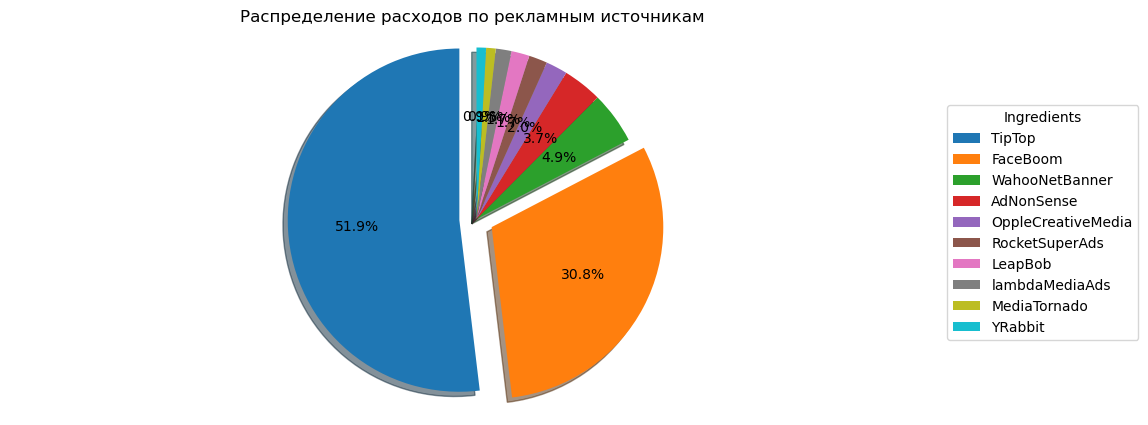

In [37]:
labels = channel_costs.index
sizes = channel_costs['costs']
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(labels,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.title('Распределение расходов по рекламным источникам ')

plt.show()

***Наблюдение.*** Больше половины расходов на маркетинг потратили на канал TipTop (52%). Второй по величине расходов на рекламу канал FaceBoom (31%).

Посмотрим, как менялись расходы по неделям и месяцам.

In [38]:
#добавим столбцы с месяцем и номером недели в таблицу расходов
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

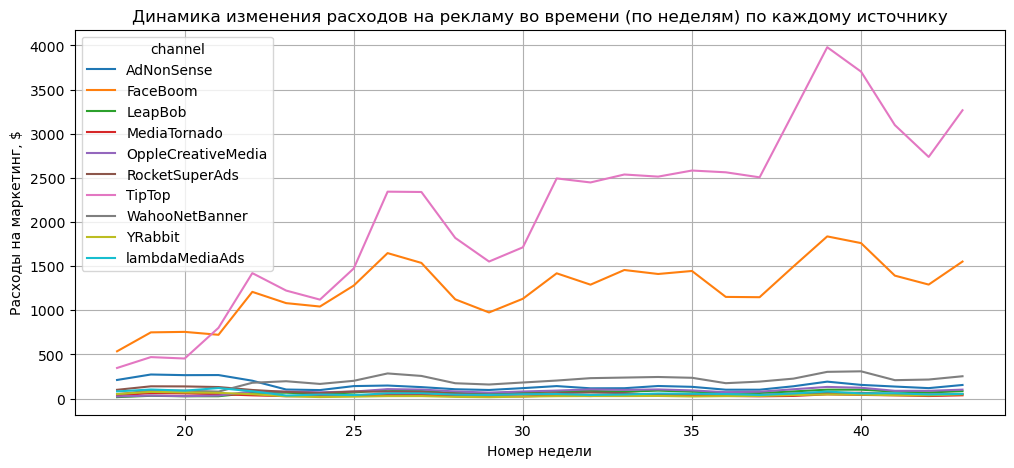

In [39]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True)
plt.title('Динамика изменения расходов на рекламу во времени (по неделям) по каждому источнику')
plt.xlabel('Номер недели')
plt.ylabel('Расходы на маркетинг, $');

***Наблюдение.*** Из графика видно, что расходы на TipTop стремительно увеличивались и достигли пика в $4000 к 39й неделе. 

Расходы на канал FaceBoom росли плавно и в основном оставались в диапазоне $1000-2000. 

Расходы на другие каналы оставались примерно на одном уровне ниже $500.

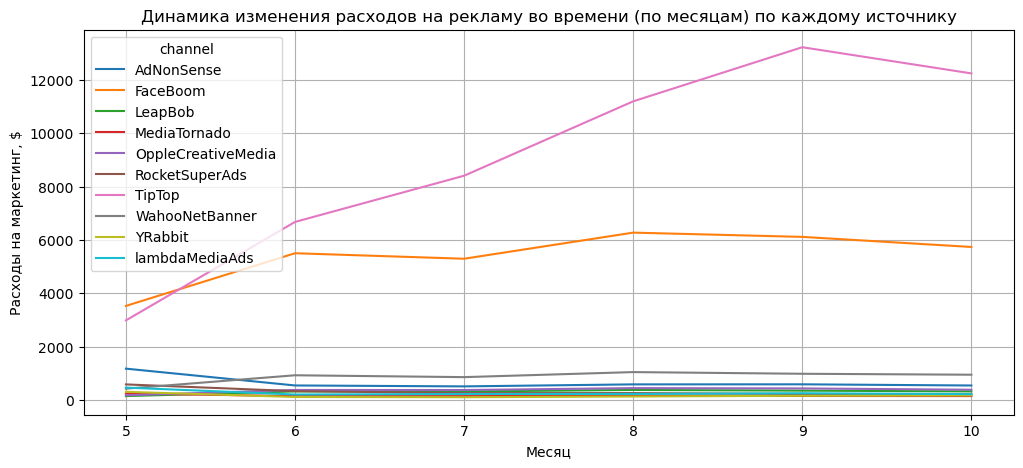

In [40]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True)
plt.title('Динамика изменения расходов на рекламу во времени (по месяцам) по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы на маркетинг, $');

***Наблюдение.*** Из графика динамики расходов по месяцам видно, что расходы на TipTop стремительно увеличивались и достигли пика в сентябре, что в два раза больше расходов на FaceBoom и в четыре раза больше расходов на остальные каналы.

Посмотрим на среднюю стоимость привлечения одного клиента по источникам.

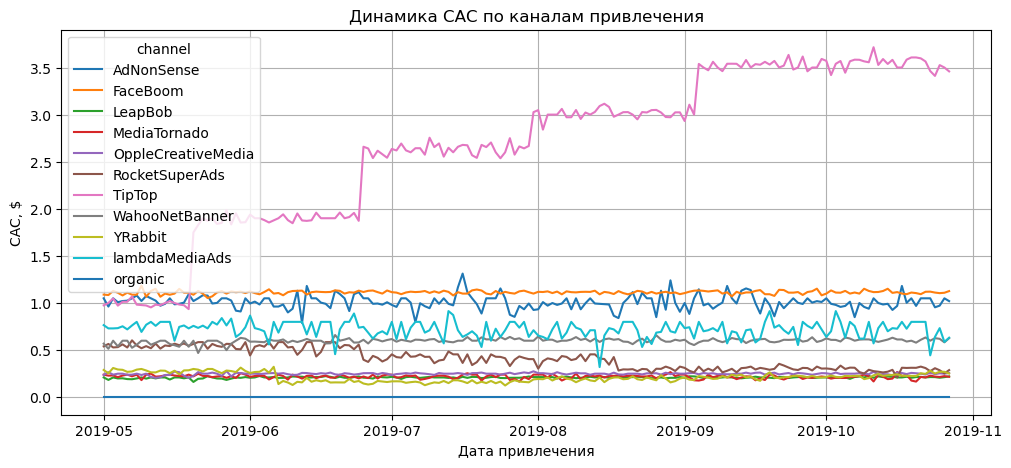

In [41]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True)
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [42]:
#средняя стоимость привлечения одного пользователя по рекламным каналам
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [43]:
#средний САС по проекту
round(profiles['acquisition_cost'].mean(), 3)

0.703

***Наблюдение:*** Средняя стоимость привлечения одного пользователя на канале TipTop в 2.5 раза превосходит стоимость на каналах FaceBoom и AdNonSense и растет с течением времени. 

Средняя стоимость на остальных каналах почти не изменяется.

Проверим, окупается ли реклама.

***Вывод.***
- Общая сумма расходов на маркетинг составила $105497,3.
- Самый дорогой канал TipTop (доля расходов 52%). Второй по величине расходов - FaceBoom (31%).
- Средняя стоимость привлечения одного пользователя на канале TipTop в 2.5 раза превосходит стоимость на каналах FaceBoom и AdNonSense и растет с течением времени. Однако однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки - TipTop лишь на 4 месте. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
- Средняя стоимость на остальных каналах почти не изменяется.

### Оценка окупаемости рекламы

Момент анализа 1 ноября 2019 года, горизонт анализа - 14 дней. 
- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию и удержание пользователей, а также динамику их изменения.
- Проанализируем окупаемость рекламы с разбивкой по устройствам.
- Проанализируем окупаемость рекламы с разбивкой по странам.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

In [44]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 # горизонт анализа
profiles = profiles.query('channel != "organic"') # отфильтруем органических пользователей

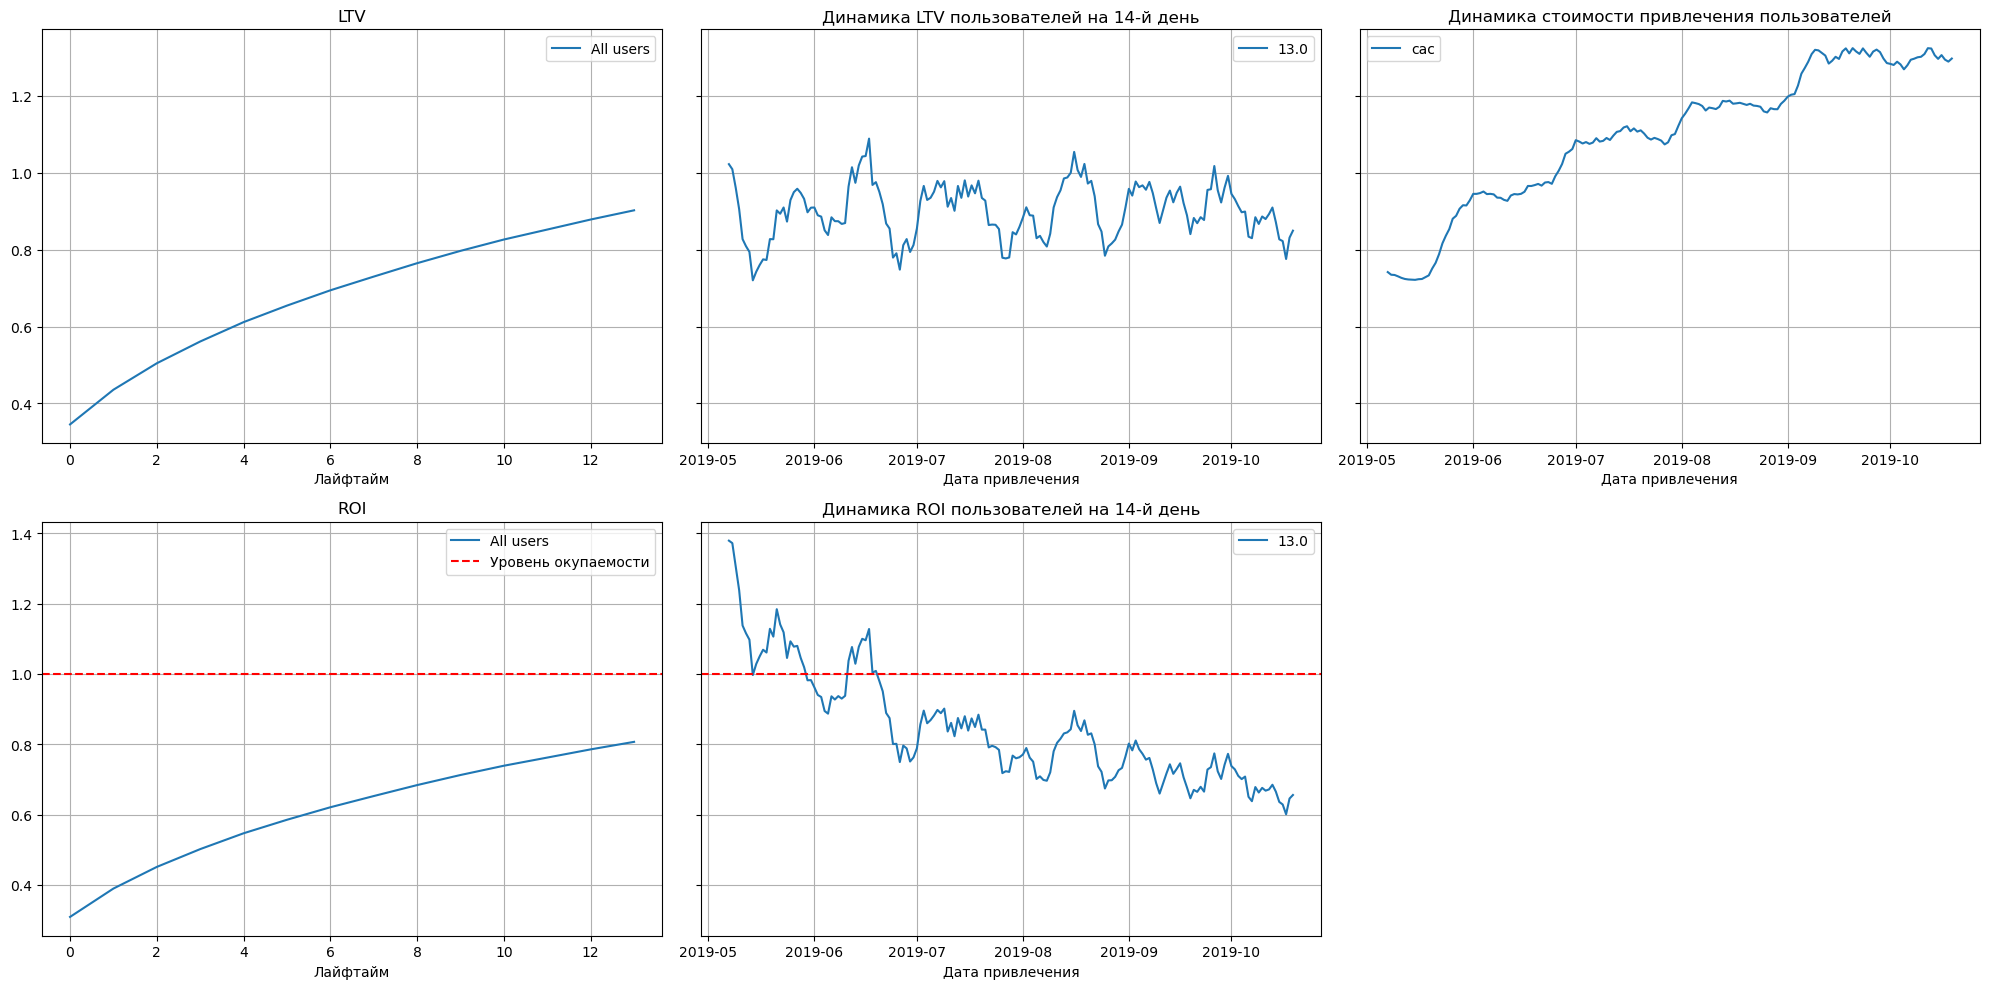

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

***Наблюдение.***
Реклама не окупается. ROI к концу заданного горизонта анализа чуть выше 80%.
CAC растет. Резкий скачок в июне, затем плавный рост до сентября. Компания увеличивала рекламный бюджет в течение всего периода.
LTV достаточно стабилен. Качествао пользователей не ухудшается.

Посмотрим на конверсию и удержание.

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)
conversion_grouped

cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197

In [47]:
conversion_history

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.058974  0.066667  0.071795  0.071795  0.076923   
2019-05-02          323  0.058824  0.068111  0.068111  0.068111  0.068111   
2019-05-03          346  0.057803  0.069364  0.075145  0.078035  0.083815   
2019-05-04          457  0.070022  0.074398  0.076586  0.078775  0.085339   
2019-05-05          438  0.036530  0.043379  0.047945  0.052511  0.052511   
...                 ...       ...       ...       ...       ...       ...   
2019-10-15          442  0.065611  0.067873  0.072398  0.072398  0.079186   
2019-10-16          436  0.045872  0.048165  0.057339  0.057339  0.057339   
2019-10-17          449  0.060134  0.066815  0.073497  0.073497  0.075724   
2019-10-18          591  0.081218  0.082910  0.084602  0.086294  0.087986   
2019-10-19          588  0.061224  0.066327  0.073129  0.076531  0.078231   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.076923  0.076923  0.079487  0.082051  0.082051  0.082051   
2019-05-02  0.068111  0.068111  0.068111  0.068111  0.068111  0.071207   
2019-05-03  0.083815  0.083815  0.083815  0.083815  0.083815  0.083815   
2019-05-04  0.085339  0.087527  0.089716  0.089716  0.091904  0.091904   
2019-05-05  0.052511  0.052511  0.052511  0.052511  0.052511  0.052511   
...              ...       ...       ...       ...       ...       ...   
2019-10-15  0.081448  0.083710  0.083710  0.083710  0.085973  0.085973   
2019-10-16  0.059633  0.059633  0.059633  0.059633  0.059633  0.059633   
2019-10-17  0.075724  0.077951  0.077951  0.080178  0.080178  0.080178   
2019-10-18  0.087986  0.091371  0.091371  0.091371  0.093063  0.094755   
2019-10-19  0.081633  0.081633  0.081633  0.083333  0.083333  0.083333   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.082051  0.082051  0.082051  
2019-05-02  0.071207  0.071207  0.071207  
2019-05-03  0.083815  0.083815  0.086705  
2019-05-04  0.091904  0.091904  0.091904  
2019-05-05  0.052511  0.052511  0.052511  
...              ...       ...       ...  
2019-10-15  0.085973  0.085973  0.085973  
2019-10-16  0.059633  0.059633  0.061927  
2019-10-17  0.080178  0.080178  0.080178  
2019-10-18  0.094755  0.094755  0.094755  
2019-10-19  0.085034  0.086735  0.086735  

[172 rows x 15 columns]

In [48]:
# сверим количество уникальных пользователей за изучаемый период 

report = profiles.query('datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()')

print('Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), conversion_grouped['cohort_size'].sum()))

Общее количество новых пользователей: 88644 88644


Количество пользователей совпадает.
Оценим кривую конверсии.

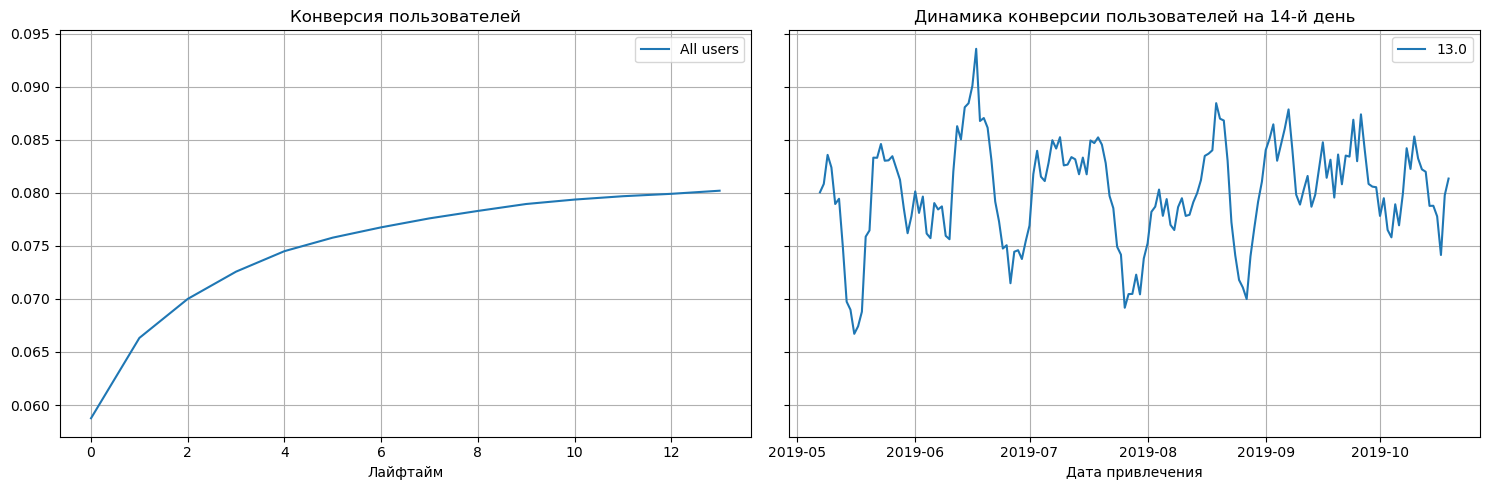

In [49]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Кривая конверсии растет, однако очень медленно.

Убедимся, что в таблицах конверсий нет значений больше единицы. 

In [50]:
conversion_grouped[conversion_grouped > 1].fillna('')

cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0  \
cohort                                                                          
All users        88644                                                          

          13.0  
cohort          
All users

CR выше единицы нет.

In [51]:
conversion_history[conversion_history > 1].fillna('')

cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0  \
dt                                                                          
2019-05-01          390                                                     
2019-05-02          323                                                     
2019-05-03          346                                                     
2019-05-04          457                                                     
2019-05-05          438                                                     
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2019-10-15          442                                                     
2019-10-16          436                                                     
2019-10-17          449                                                     
2019-10-18          591                                                     
2019-10-19          588                                                     

           12.0 13.0  
dt                    
2019-05-01            
2019-05-02            
2019-05-03            
2019-05-04            
2019-05-05            
...         ...  ...  
2019-10-15            
2019-10-16            
2019-10-17            
2019-10-18            
2019-10-19            

[172 rows x 15 columns]

Ни в одной из ячеек нет ошибочного значения конверсии — выше единицы.

Проверим, равно ли число новых покупателей из таблицы с данными о покупках (orders) размеру когорты, умноженному на общую конверсию, то есть конверсию за последний лайфтайм.

In [52]:
print(
    'Количество уникальных покупателей из таблицы конверсии: {:.0f}'.format(
        conversion_grouped['cohort_size'][0] * conversion_grouped[13][0])) 

Количество уникальных покупателей из таблицы конверсии: 7109


In [53]:
# рассчитываем число покупателей по данным о покупках

report = orders.merge(
    profiles.query(
        'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
    ),
    on='user_id',
)
# рассчитываем лайфтайм для каждой покупки
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days
# исключаем лишние лайфтаймы
report = report.query('lifetime <= 13')

print(
    'Количество уникальных покупателей из таблицы заказов: {:.0f}'.format(
        len(report['user_id'].unique())
    )
)

Количество уникальных покупателей из таблицы заказов: 7109


Количество новых покупателей, рассчитанное двумя способами, совпадает. Конверсия верна.

Проверим удержание.

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)
retention_grouped

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        81334  1.0  0.176876  0.086594  0.051823  0.033504  0.024701   
True          7310  1.0  0.380985  0.293023  0.235568  0.210260  0.191245   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018651  0.014188  0.011729  0.009541  0.007488  0.006393  0.006012   
True   0.166758  0.156908  0.145144  0.136389  0.135021  0.121888  0.118741   

             13  
payer            
False  0.004709  
True   0.104925

In [55]:
retention_history

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-15           38  1.0  0.421053  0.263158  0.236842  0.157895   
      2019-10-16           27  1.0  0.481481  0.407407  0.259259  0.074074   
      2019-10-17           36  1.0  0.305556  0.250000  0.194444  0.083333   
      2019-10-18           56  1.0  0.321429  0.321429  0.232143  0.214286   
      2019-10-19           51  1.0  0.372549  0.333333  0.176471  0.176471   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-15  0.105263  0.078947  0.157895  0.131579  0.157895  0.105263   
      2019-10-16  0.148148  0.222222  0.148148  0.111111  0.111111  0.185185   
      2019-10-17  0.111111  0.027778  0.111111  0.166667  0.138889  0.111111   
      2019-10-18  0.321429  0.125000  0.142857  0.196429  0.142857  0.142857   
      2019-10-19  0.176471  0.117647  0.176471  0.156863  0.137255  0.117647   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427  
...                    ...       ...       ...  
True  2019-10-15  0.105263  0.026316  0.157895  
      2019-10-16  0.037037  0.037037  0.111111  
      2019-10-17  0.027778  0.138889  0.000000  
      2019-10-18  0.142857  0.089286  0.035714  
      2019-10-19  0.117647  0.117647  0.000000  

[344 rows x 15 columns]

In [56]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период?

report = profiles.query(
     # в профилях находим пользователей, привлечённых с 1 по 5 мая
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), retention_grouped['cohort_size'].sum()
    )
)

# сумма размеров платящих когорт равна числу покупателей в изучаемый период?

report = profiles.query(
    # в профилях находим платящих пользователей, привлечённых с 1 по 5 мая
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date() and payer == True'
)
print(
    # считаем уникальных платящих пользователей в профилях 
    # и складываем размеры платящих когорт
    'Общее количество новых покупателей: {} {}'.format(
        len(report['user_id'].unique()),
        retention_grouped.query('payer == True')['cohort_size'].sum(),
    )  
)

Общее количество новых пользователей: 88644 88644
Общее количество новых покупателей: 7310 7310


Данные сходятся.
Теперь оценим кривые удержания.

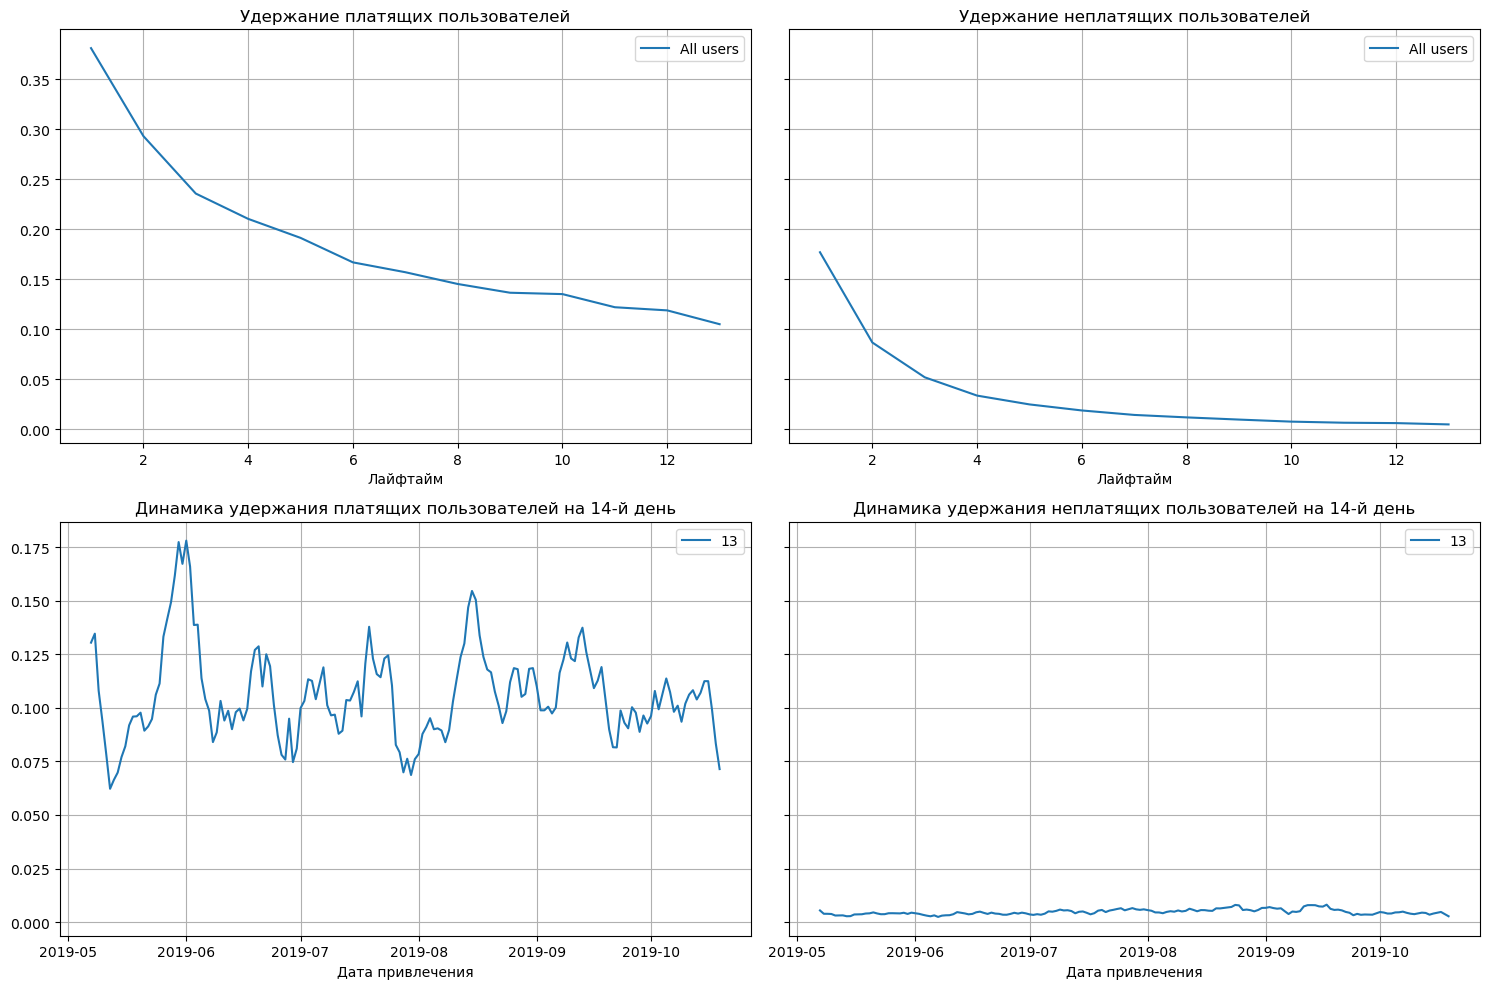

In [57]:
plot_retention(retention_grouped, retention_history, horizon_days)

Кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются.

Проанализируем окупаемость рекламы с разбивкой по устройствам.

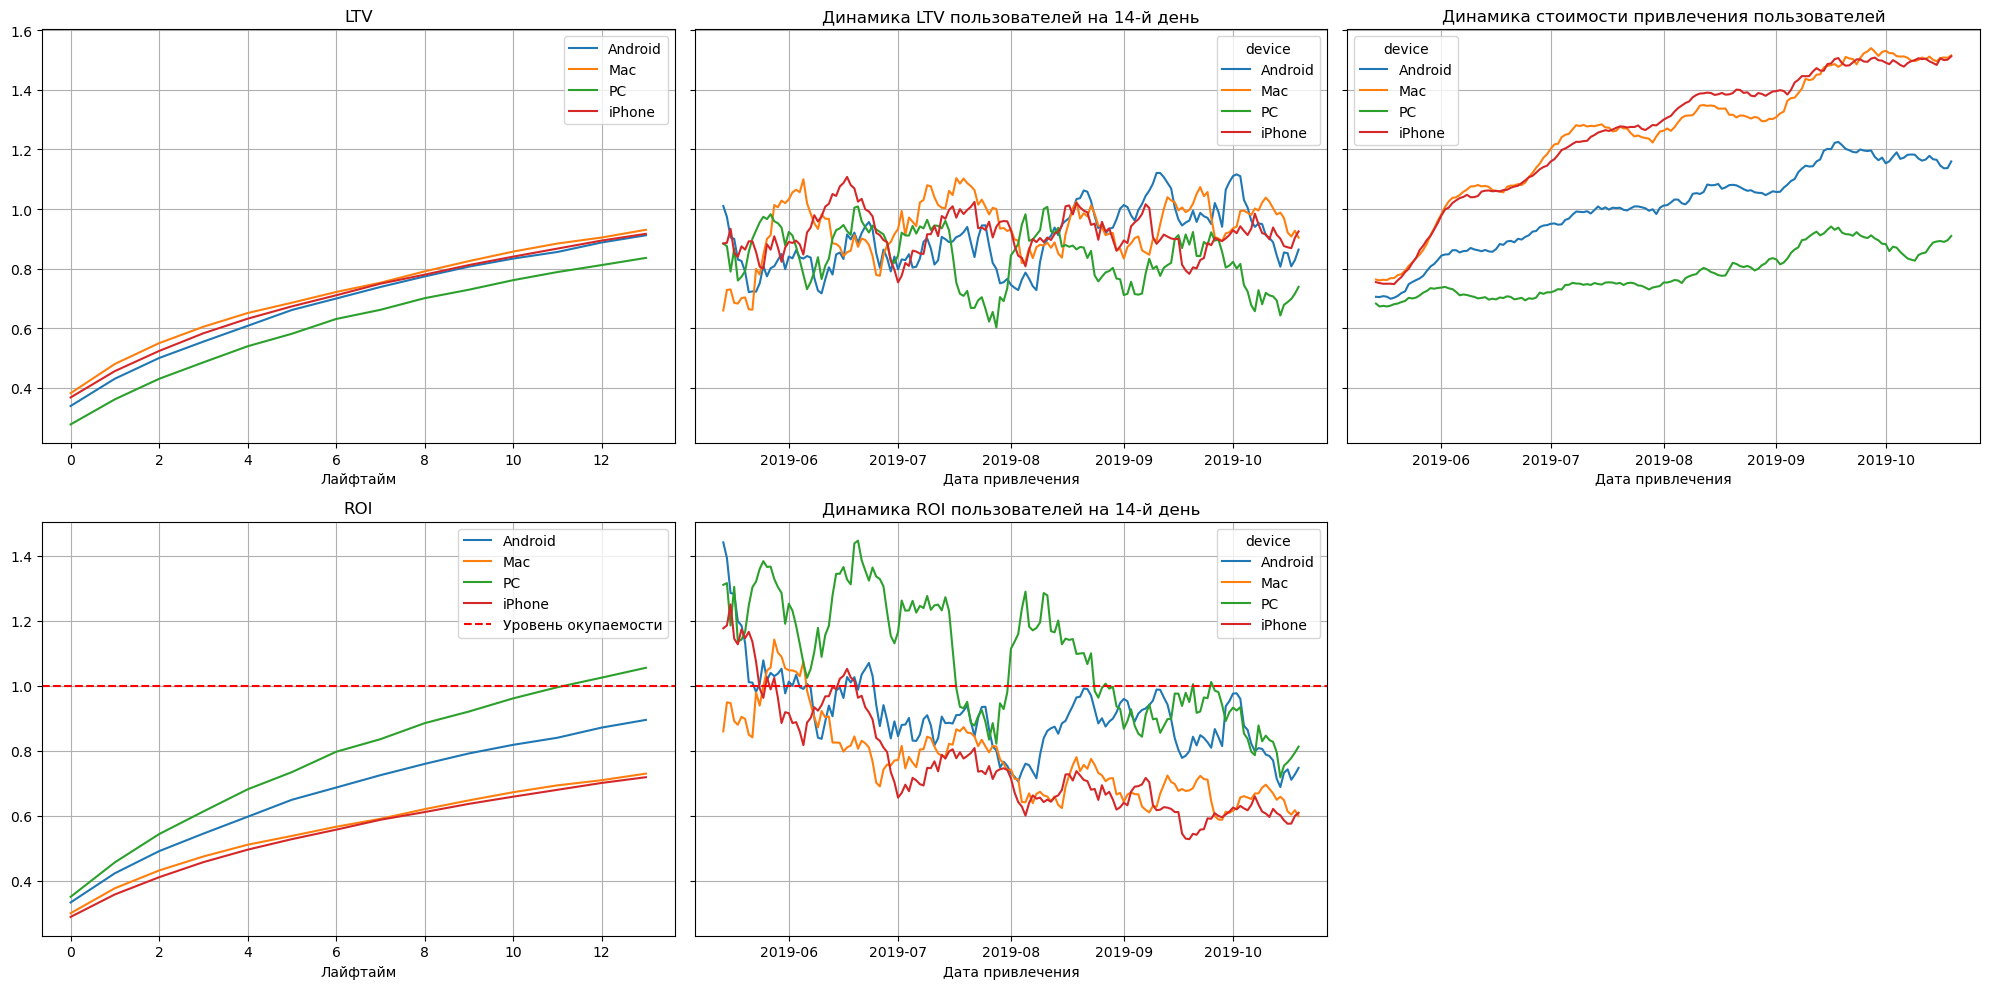

In [58]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Наблюдение.*** Пользователи PC окупаются на 11 день лайфтайма, а владельцы Mac, Android и iPhone — нет.

Узнаем, в чём причина: в низкой конверсии или низком удержании.

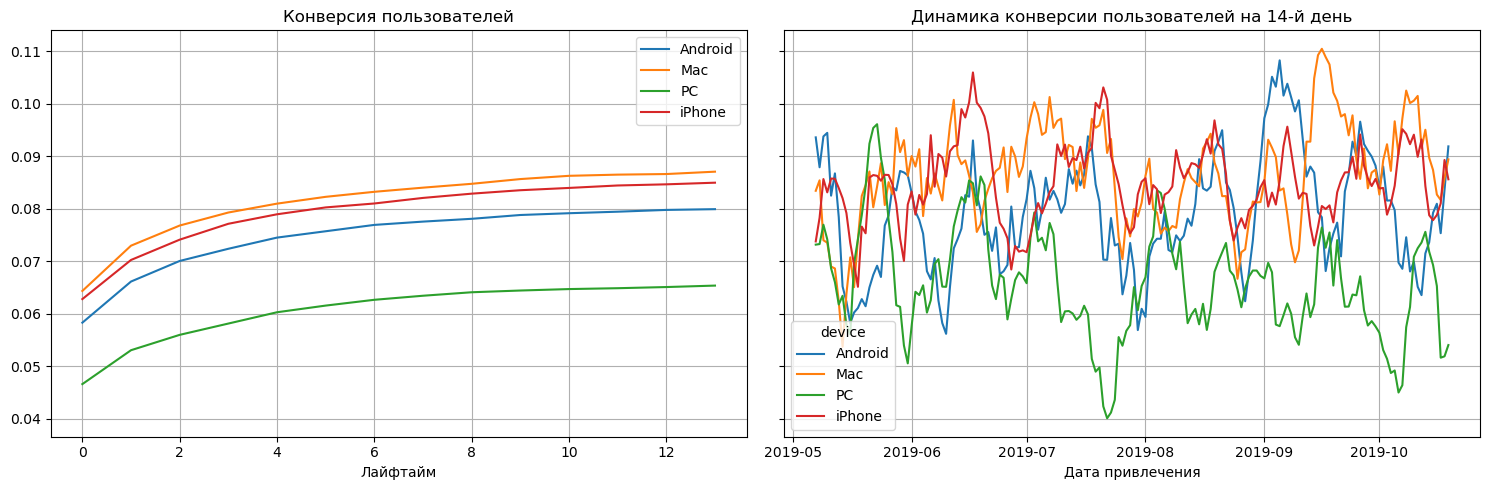

In [59]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Наблюдение.*** Судя по графикам, пользователи Mac, Android и iPhone конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. 

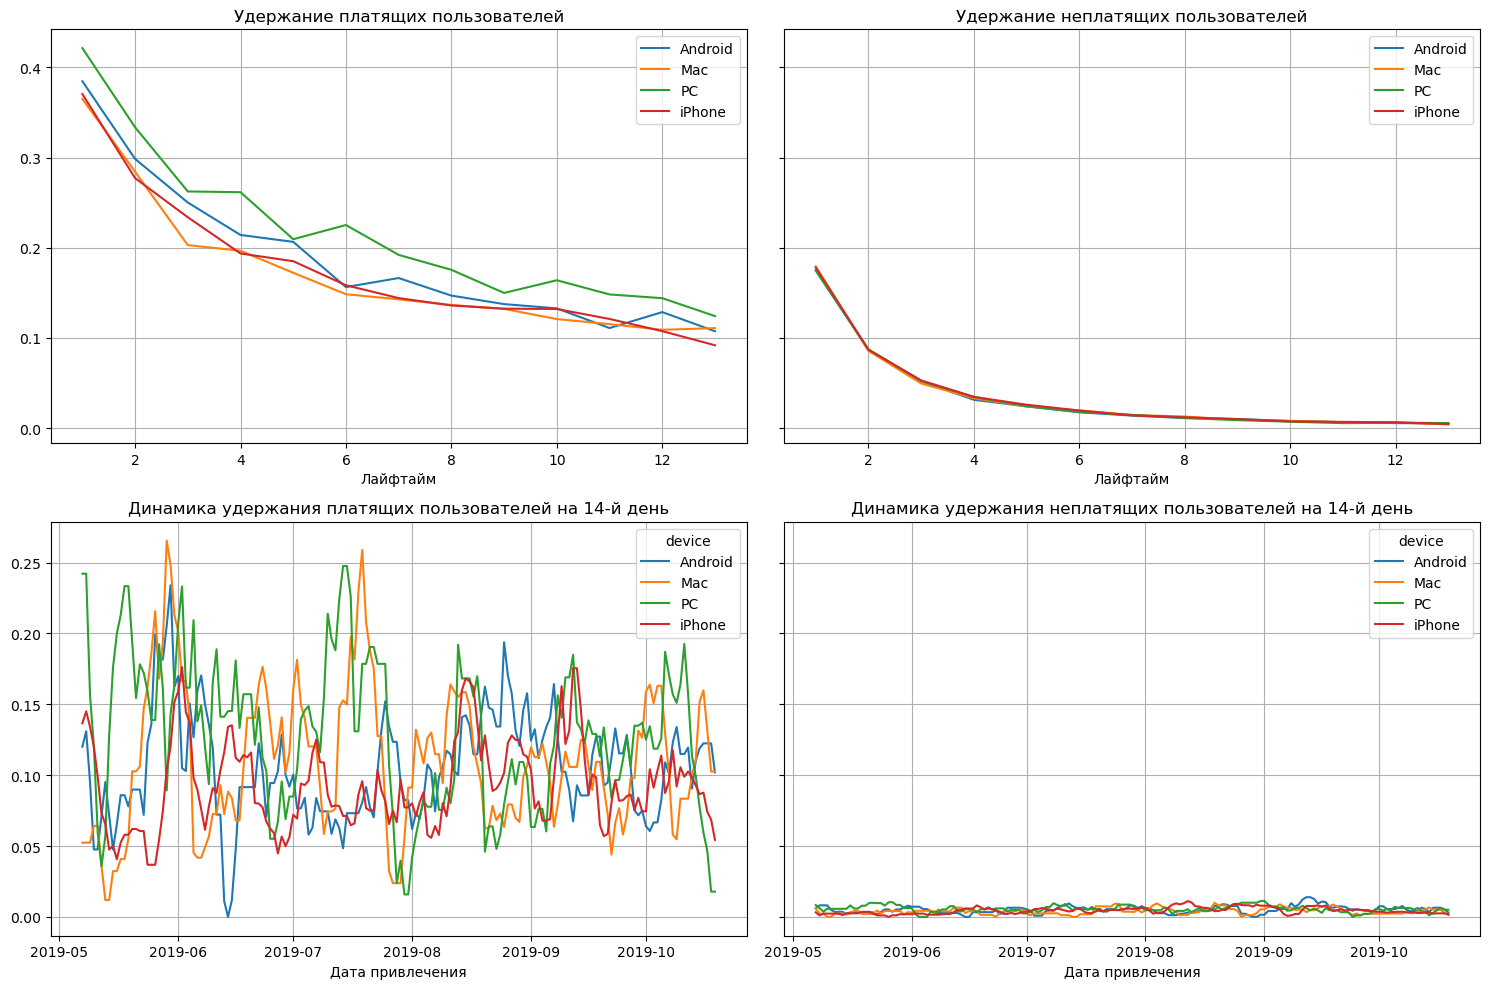

In [60]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***Наблюдение.*** Удержание пользователей Mac, Android и iPhone тоже стабильно.

Возможно проблемы с окупаемостью связаны с высокой стоимостью привлечения пользователей, что видно из графика динамики САС.

Проанализируем окупаемость рекламы с разбивкой по странам.

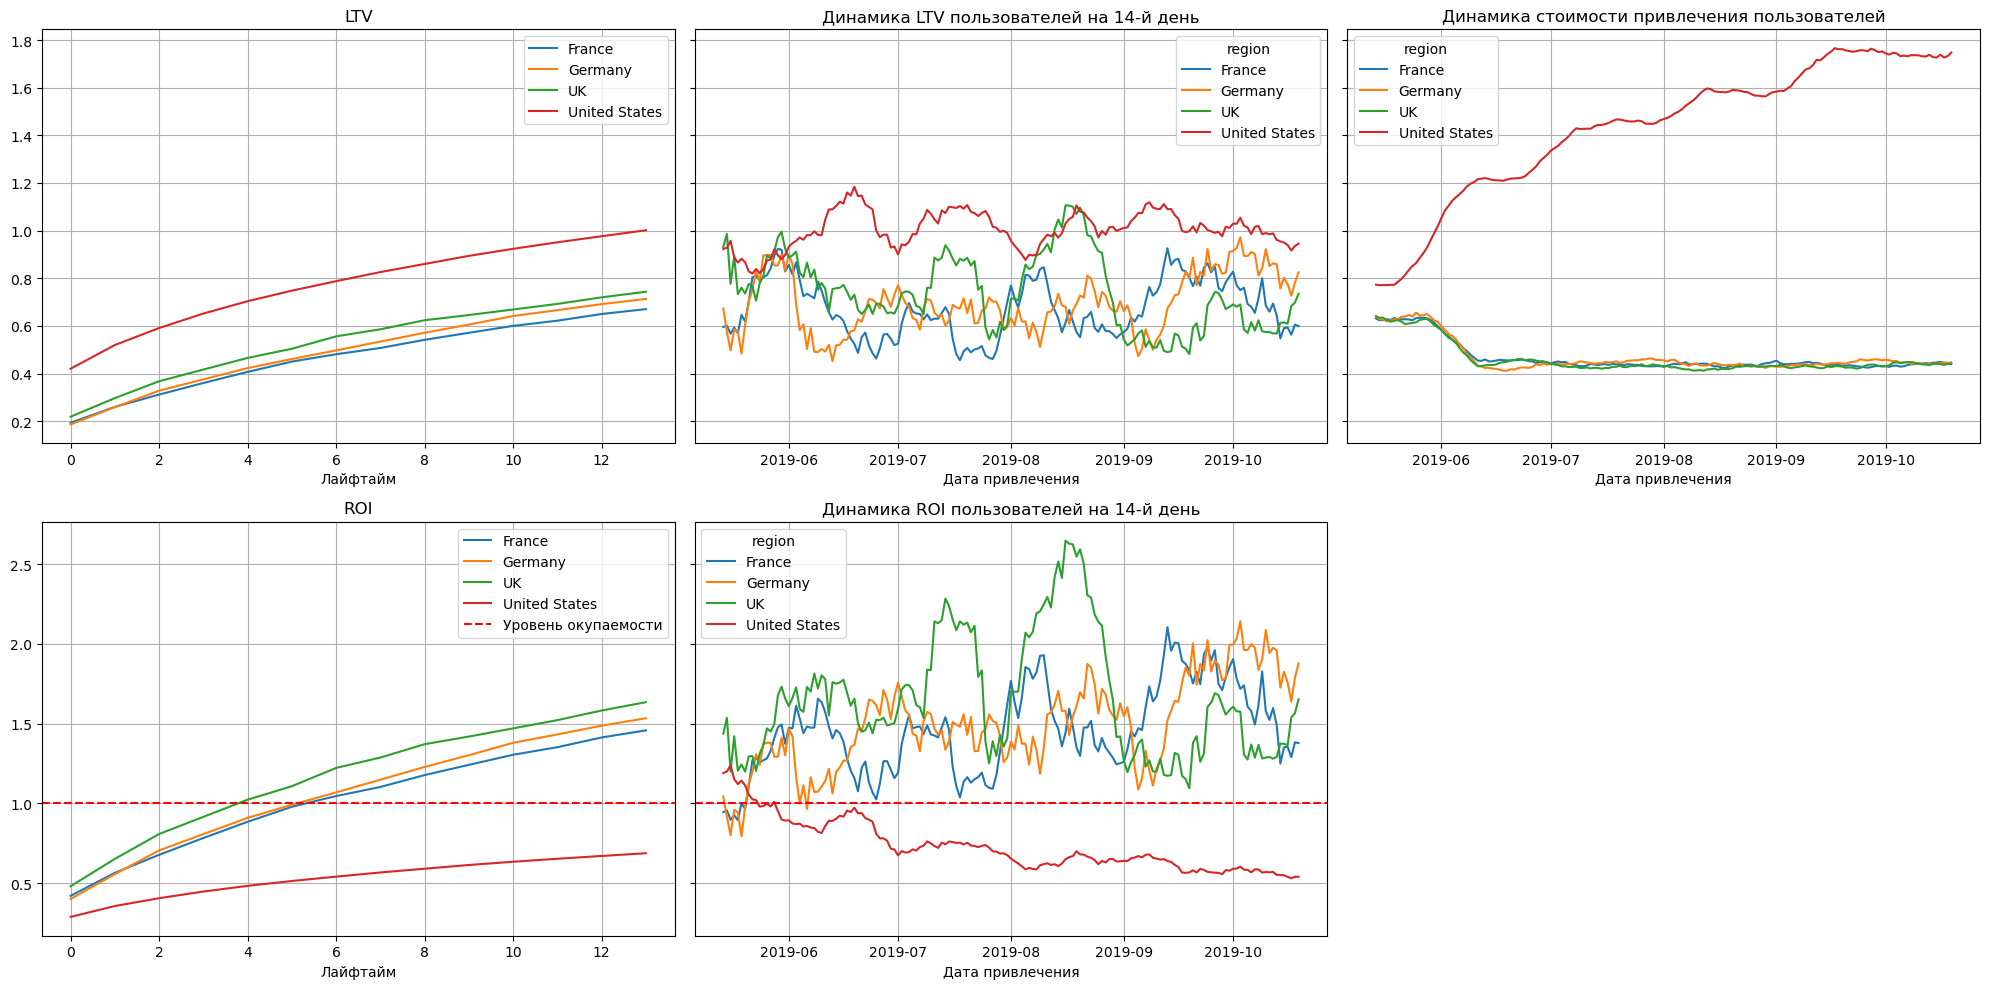

In [61]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Наблюдение***.
- Реклама в США не окупается.
- Стоимость привлечения пользователей в США гораздо выше и постоянно растет.
- В июне виден скачок стоимости рекламы в США и резкое падение в других регионах.
- LTV в США примерно на 20% выше остальных регионов.

Проверим конверсию и удержание по регионам.

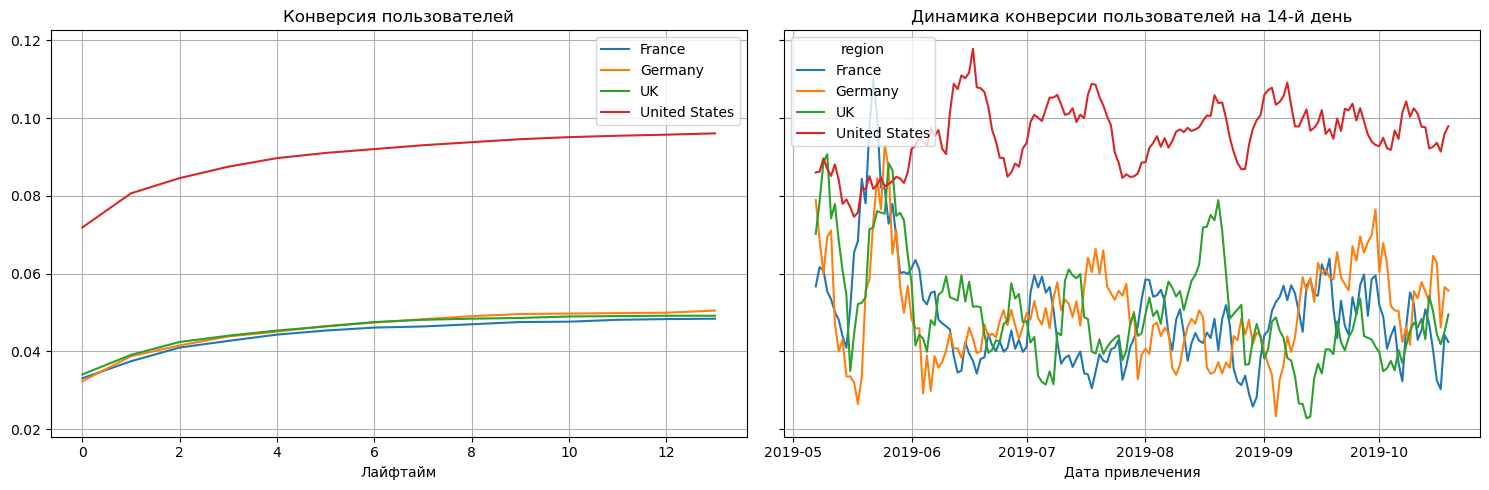

In [62]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Наблюдение.*** США - явный лидер по конверсии. Проверим удержание.

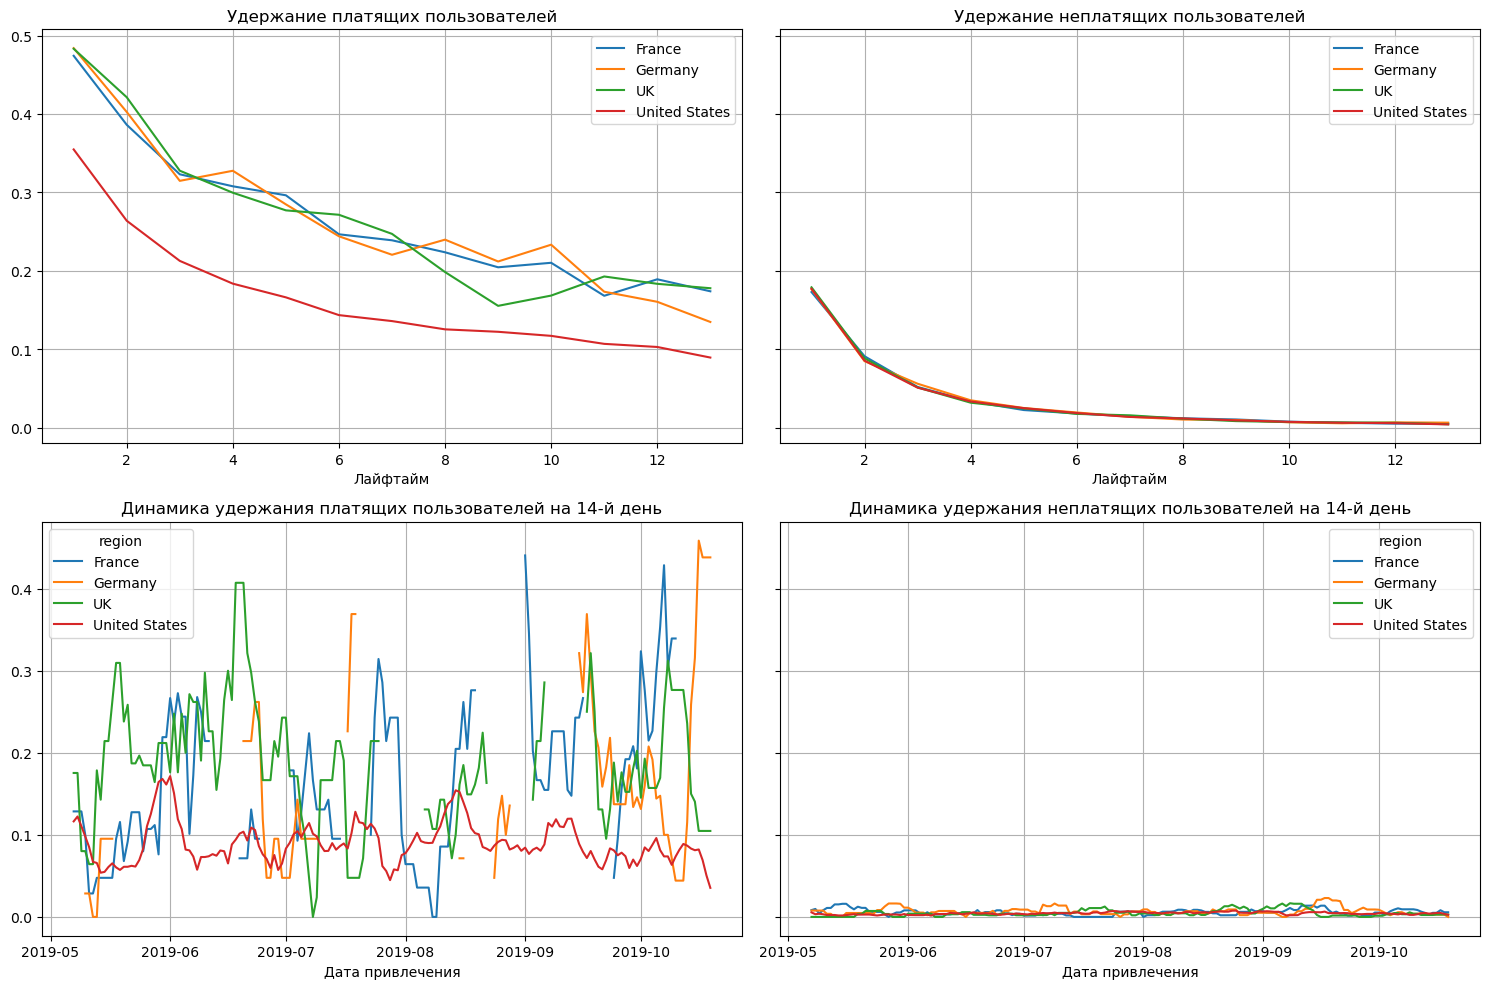

In [63]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***Наблюдение.*** Удержание пользователей США заметно ниже других регионов. Стоимость привлечения клиентов несоизмеримо выше, чем в других регионах. Возможно проблемы окупаемости в неэффективном рекламном канале.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

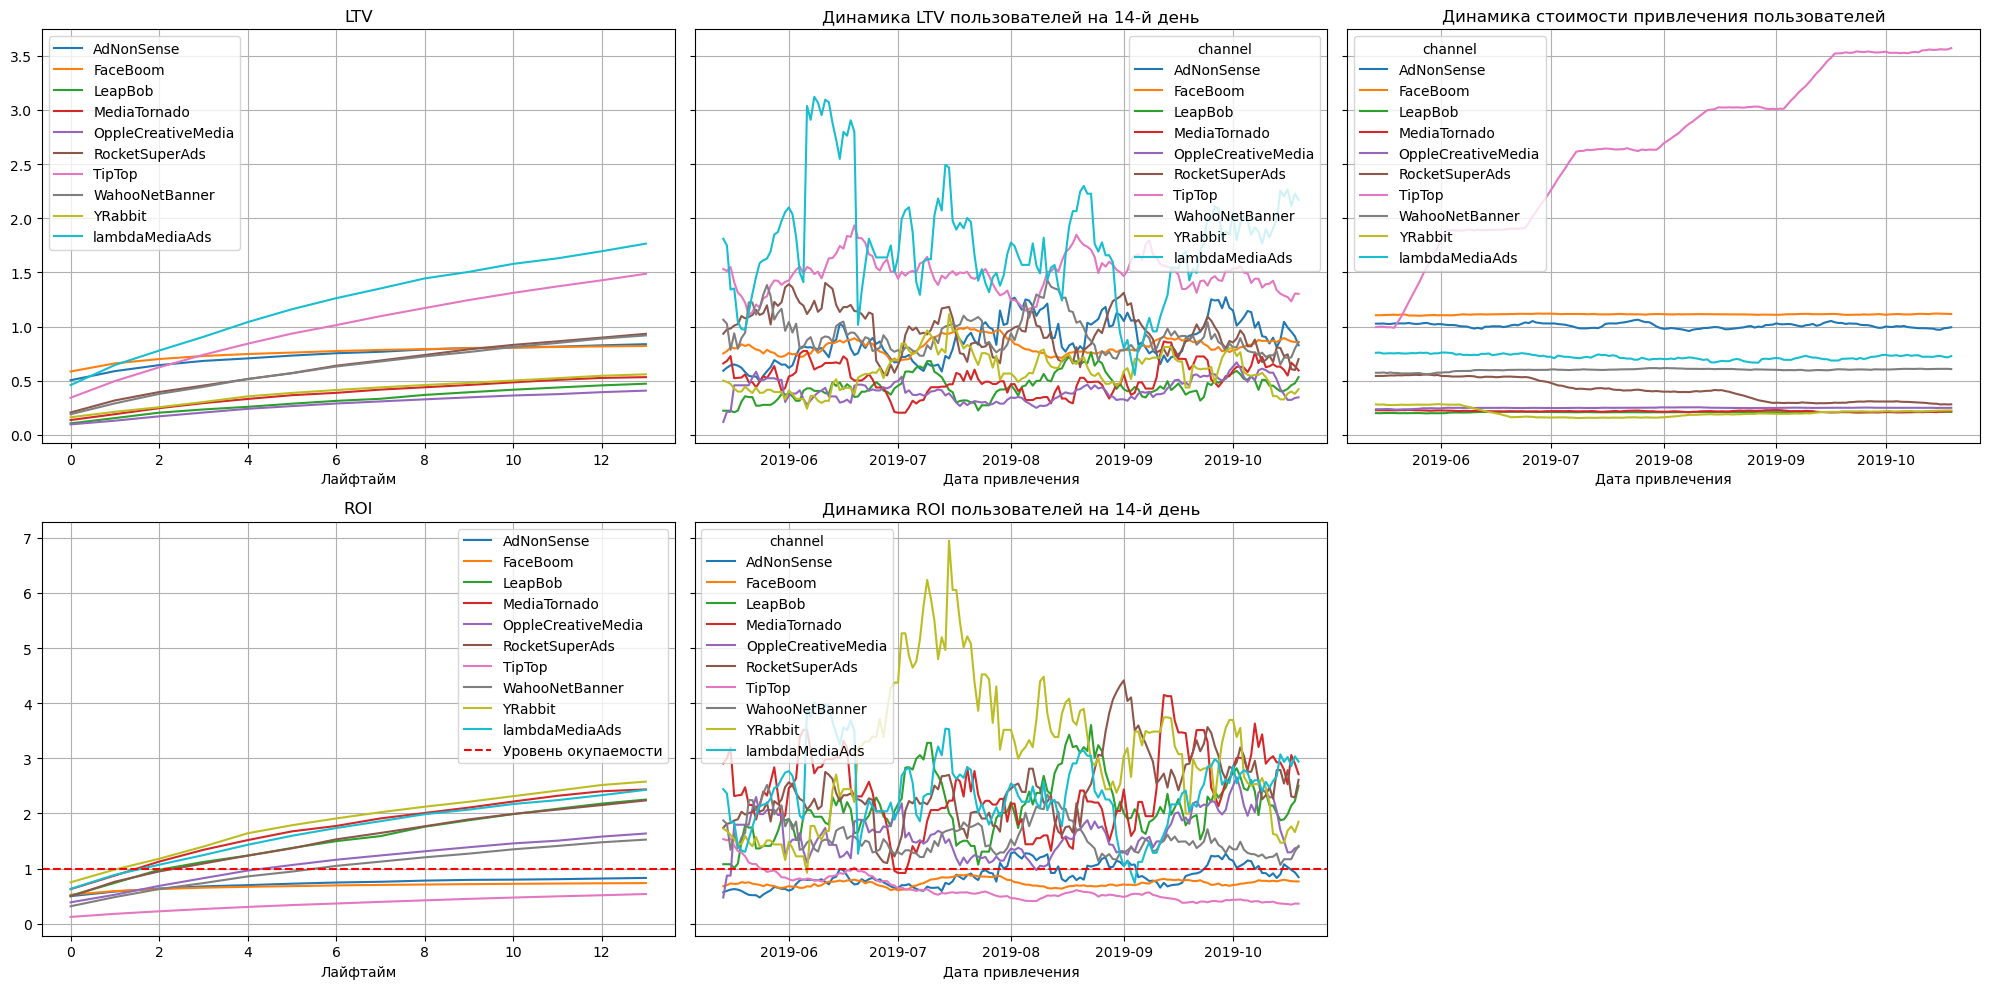

In [64]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Наблюдение.*** Заметно, что самые дорогие по средней стоимости привлечения каналы TipTop, FaceBoom и AdNonSense стабильно не окупаются. Стоимость привлечения пользователей на TipTop постоянно растет и выше всех остальных каналов.

Посмотрим на удержание и конверсию.

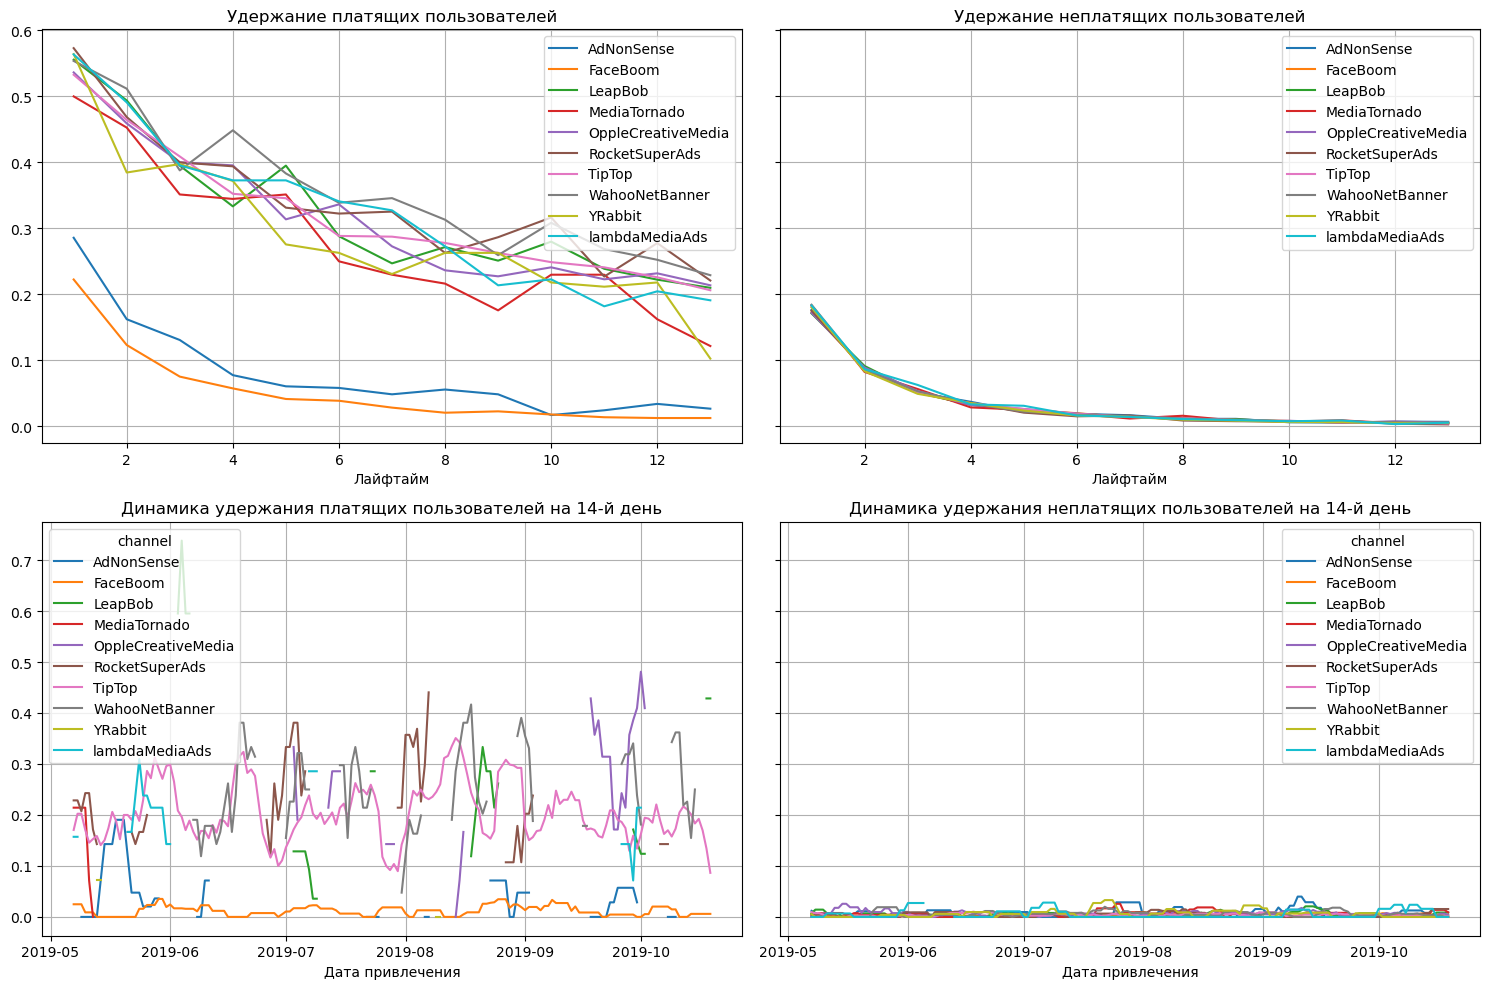

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

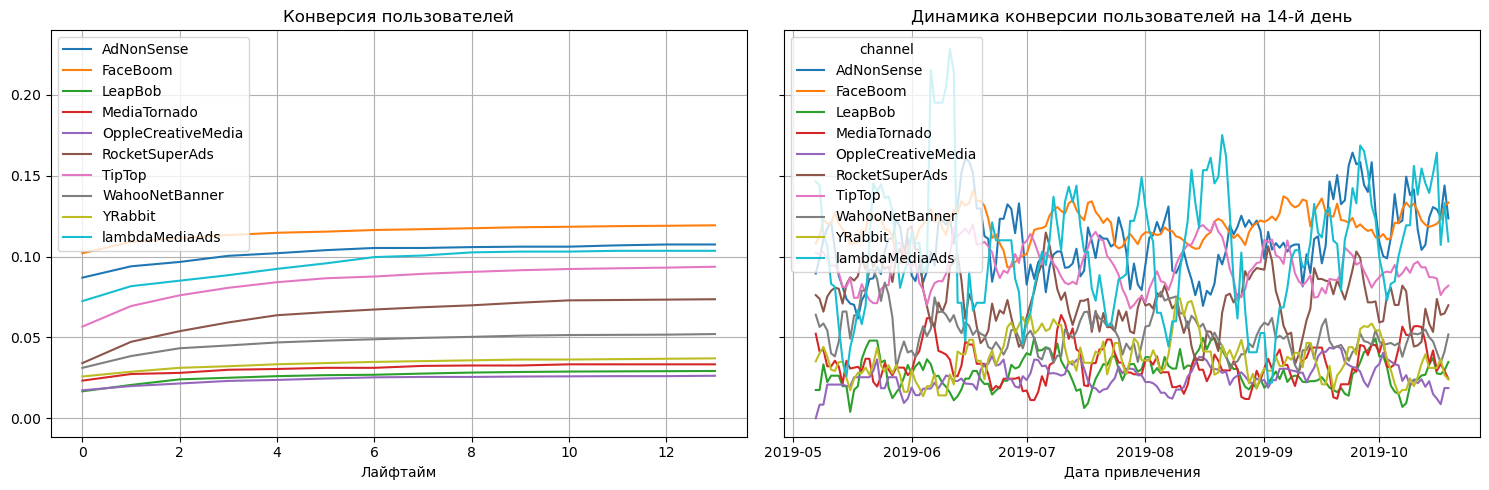

In [66]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Наблюдение.*** FaceBoom и AdNonSense - явные аутсайдеры по удержанию пользователей. TipTop несмотря на свою убыточность, показывает стабильное удержание наравне с остальными каналами, однако его высокая стоимость может оказывать негативное влияние на окупаемость рекламы в целом.

***Вывод.*** Исходя из анализа можно сделать предположение, что для пользователей из США используется крайне дорогой и неэффективный канал TipTop, что отрицательно влияет на оккупаемость в США и на окупаемость в целом.

Рекомендовано пересмотреть условия либо прекратить сотрудничество с каналом TipTop, а также двумя другими явных аутсайдеров - FaceBoom и AdNonSense.

### Общий вывод

***Поставленная задача*** - разобраться в причинах роста убытков приложения Procrastinate Pro+ и помочь компании выйти в плюс.

Был проведен анализ рекламных вложений для приложения Procrastinate Pro+ и данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года. В ходе исследования выявлены следующие особенности.

- В данных содержится информация о пользователях из четырех регионов - США, Великобритания, Франция и Германия. Доля платящих пользователей выше всего в США - около 7%.
- Платящие пользователи предпочитают Mac(6.4%) и iPhone(6.2%) немногим больше, чем Android(5.9%) и PC(5%).
- Больше всего платящих пользователей в численном и процентном выражении привлек канал FaceBoom(12.2% и 3557 клиентов). Так же в пятерке лидеров AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds.
- Общая сумма расходов на маркетинг составила $105497,3.
- Самый дорогой канал TipTop (доля расходов 52%). Второй по величине расходов - FaceBoom (31%).
- Средняя стоимость привлечения одного пользователя на канале TipTop в 2.5 раза превосходит стоимость на каналах FaceBoom и AdNonSense и растет с течением времени. Однако однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки - TipTop лишь на 4 месте. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
- Средняя стоимость на остальных каналах почти не изменяется.
- Исходя из анализа можно сделать предположение, что для пользователей из США используется крайне дорогой и неэффективный канал TipTop, что отрицательно влияет на оккупаемость в США и на окупаемость в целом.

***Рекомендации для отдела маркетинга.***
- Рекомендовано пересмотреть условия либо прекратить сотрудничество с каналом TipTop, а также двумя другими явных аутсайдеров - FaceBoom и AdNonSense.
- Рекомендованы альтернативные каналы RocketSuperAds, WahooNetBanner для дальнейшего развития.